<a href="https://colab.research.google.com/github/gibranhasan14/Side-Projects/blob/master/3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Reading the data
mydata = pd.read_json('act-prepurchase.json')

In [0]:
mydata.head()

,categories,magoosh_id,mixpanel_id,paid_t,subscription_id,times
0,"non provided search, non provided search, blog",0,[154b633dbc26d3-0bb4d557d-524d7f3f-100200-154b...,0,0,"1507718605000, 1508000757000, 1511875234000"
1,"blog, non provided search",0,[15673638cef1f0-0f1fe1851-504b7d3c-13c680-1567...,0,0,"1501369121000, 1501369209000"
2,"email, email",0,[1569f8f44b467-0f7587d4c21e3e-576d3c76-c0000-1...,0,0,"1502260818000, 1502697712000"
3,blog,0,[15726261272c4-00a8d7c2723412-20d1644-100200-1...,0,0,1505976988000
4,"blog, blog, non provided search, blog, non pro...",0,[1572d80be4f350-08edad24cc3023-570f1423-3d10d-...,0,0,"1501509911000, 1502316644000, 1502316819000, 1..."


In [0]:
# Data preparation, finding the number of paid users and total number of users for each category
category_paid = defaultdict(int)
category_total = defaultdict(int)
for i in range(mydata.shape[0]):
    for cat in mydata.iloc[i,0].split(','):
        if mydata.iloc[i,3]:
            category_paid[cat] += 1
        category_total[cat] += 1

In [0]:
# Calculate the ratio of paid users for each category
category_ratio = {}
for key in category_paid:
    category_ratio[key] = category_paid[key]/category_total[key]

In [0]:
category_ratio

{' ACTblog': 0.00816326530612245,
 ' Affiliate': 0.13725490196078433,
 ' Facebook': 0.017488076311605722,
 ' HSblog': 0.2857142857142857,
 ' MagooshHSBlog': 0.010309278350515464,
 ' PracticeTestPDF': 0.007716049382716049,
 ' SAThome': 0.011764705882352941,
 ' act prep app': 0.028237585199610515,
 ' actblog': 0.02526315789473684,
 ' actprep': 0.024054982817869417,
 ' app': 0.043821391484942886,
 ' blog': 0.0191981735791622,
 ' branded search': 0.11705263157894737,
 ' direct': 0.06477272727272727,
 ' email': 0.12552693208430912,
 ' facebook ads': 0.02051983584131327,
 ' greblog': 1.0,
 ' instagram': 0.75,
 ' lessons_app': 0.09433962264150944,
 ' magoosh com': 0.12783560181478515,
 ' non branded search': 0.04794520547945205,
 ' non provided search': 0.058497555643275745,
 ' paid search': 0.07394302304481945,
 ' sem': 0.05555555555555555,
 'Affiliate': 0.004291845493562232,
 'actblog': 0.2,
 'app': 0.0075307173999207295,
 'blog': 0.0073957150964812715,
 'branded search': 0.0413423101199242

Text(0,0.5,'% of Become Paid User')

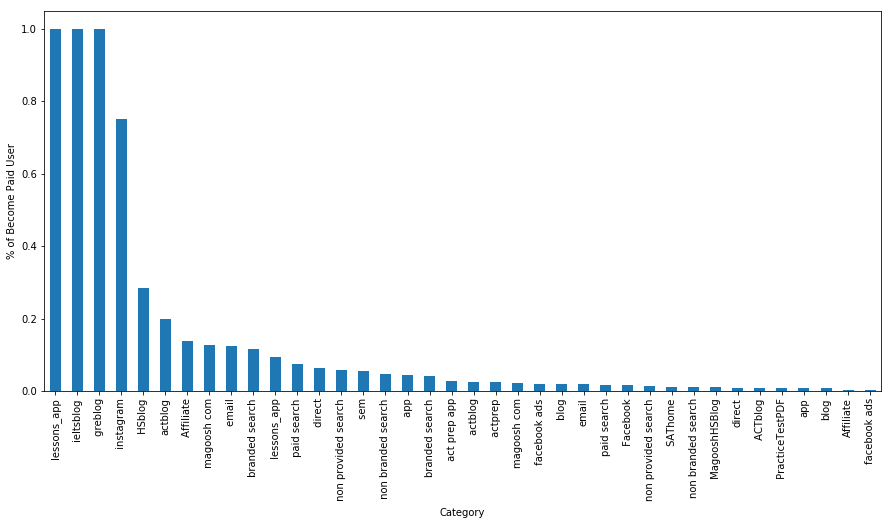

In [0]:
# sort the categories based on ratio and plot them

paid = pd.Series(category_ratio)
paid.sort_values(ascending =False).plot(kind='bar', figsize=(15,7))
plt.xlabel('Category')
plt.ylabel('% of Become Paid User')